In [2]:
import os
import pickle
import glob
import numpy as np
from gensim.models import Word2Vec
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
os.getcwd()

'/home/hiwi/Dokumente/masterthesis/masterthesis/notebooks/stats'

In [3]:
path_models = "/home/hiwi/Dokumente/masterthesis/archieve/ma_data/models/"
path_preprc = '/home/hiwi/Dokumente/masterthesis/archieve/ma_data/preprocessed/'

## Stats

In [16]:
files_none = glob.glob(path_preprc + "*_None")

corpus_none = []
for filename in files_none:
    corpus_none = corpus_none + pickle.load(open(filename, "rb")) 

corpus_none_flat = []
for sentence in corpus_none:
    for word in sentence:
        corpus_none_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_none)))
print("Words in corpus: " + str(len(corpus_none_flat)))
print("Unique words in corpus: " + str(len(set(corpus_none_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 38605


In [17]:
counter_none = Counter(corpus_none_flat)
focus_terms_none = counter_none.most_common(50)


In [39]:
#focus_terms_none

In [42]:
count_50 = 0
for term in focus_terms_none:
    count_50 += term[1]

percent_50 = count_50 / len(corpus_none_flat)

print("Total count of most common 50 words: ",count_50)
print("Percentage of vocab: ", percent_50)

Total count of most common 50 words:  355219
Percentage of vocab:  0.15923804725064575


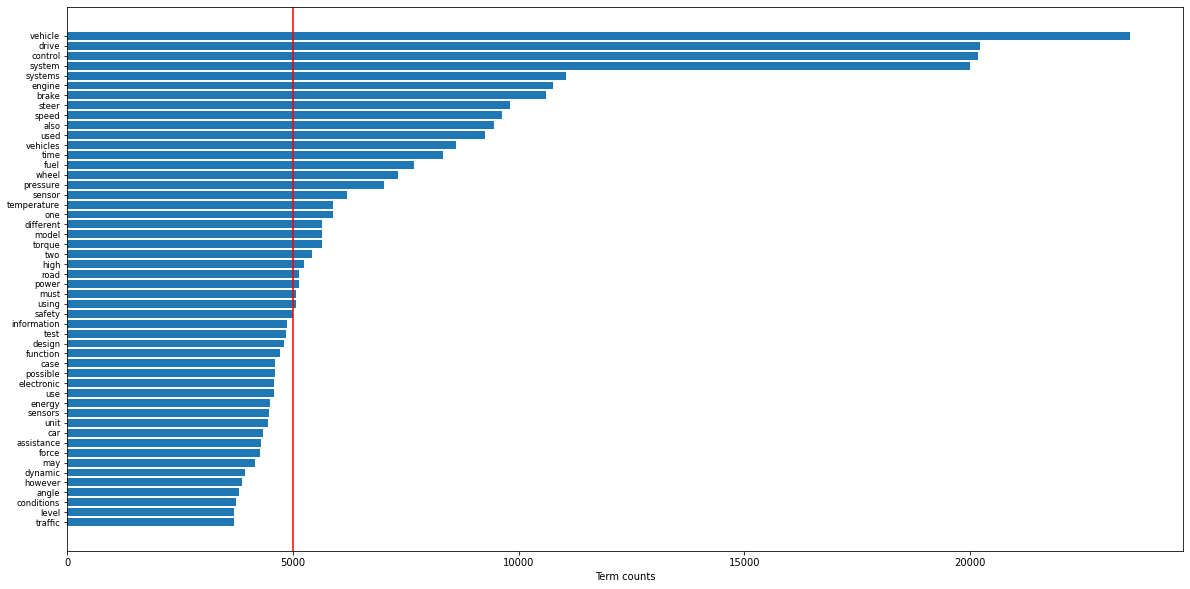

In [19]:
focus_terms_none.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_none))[0]
count = list(zip(*focus_terms_none))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(20,10))
plt.barh(y_pos, count, align='center')
plt.yticks(y_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

In [20]:
files_stem = glob.glob(path_preprc + "*_<PorterStemmer>")

corpus_stem = []
for filename in files_stem:
    corpus_stem = corpus_stem + pickle.load(open(filename, "rb"))

corpus_stem_flat = []
for sentence in corpus_stem:
    for word in sentence:
        corpus_stem_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_stem)))
print("Words in corpus: " + str(len(corpus_stem_flat)))
print("Unique words in corpus: " + str(len(set(corpus_stem_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 26093


In [21]:
counter_stem = Counter(corpus_stem_flat)
focus_terms_stem = counter_stem.most_common(50)

In [22]:
#focus_terms_stem

In [43]:
count_50 = 0
for term in focus_terms_stem:
    count_50 += term[1]

percent_50 = count_50 / len(corpus_stem_flat)

print("Total count of most common 50 words: ",count_50)
print("Percentage of vocab: ", percent_50)

Total count of most common 50 words:  454661
Percentage of vocab:  0.20381603968544995


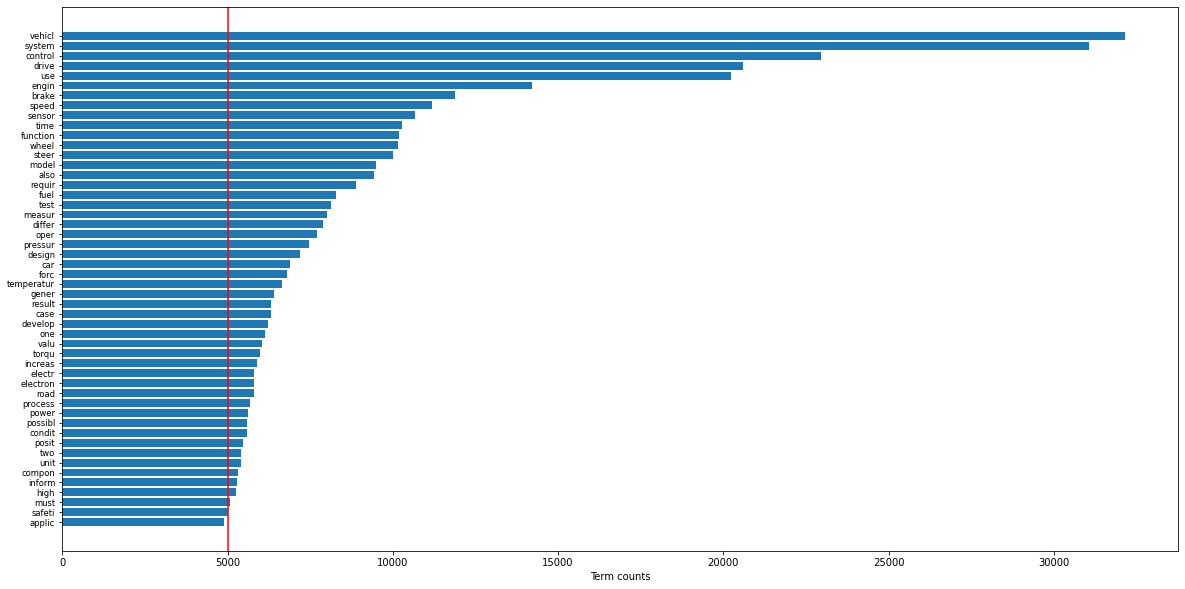

In [23]:
focus_terms_stem.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_stem))[0]
count = list(zip(*focus_terms_stem))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(20,10))
plt.barh(y_pos, count, align='center')
plt.yticks(y_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

In [4]:
files_lemma = glob.glob(path_preprc + "*_<WordNetLemmatizer>")

corpus_lemma = []
for filename in files_lemma:
    corpus_lemma = corpus_lemma + pickle.load(open(filename, "rb"))

corpus_lemma_flat = []
for sentence in corpus_lemma:
    for word in sentence:
        corpus_lemma_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_lemma)))
print("Words in corpus: " + str(len(corpus_lemma_flat)))
print("Unique words in corpus: " + str(len(set(corpus_lemma_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 31714


In [5]:
counter_lemma = Counter(corpus_lemma_flat)
focus_terms_lemma = counter_lemma.most_common(50)

In [28]:
sorted(focus_terms_lemma)[-3:]

[('value', 6058), ('vehicle', 32149), ('wheel', 10172)]

In [6]:
count_50 = 0
for term in focus_terms_lemma:
    count_50 += term[1]

percent_50 = count_50 / len(corpus_lemma_flat)

print("Total count of most common 50 words: ",count_50)
print("Percentage of vocab: ", percent_50)

Total count of most common 50 words:  432229
Percentage of vocab:  0.1937601927968362


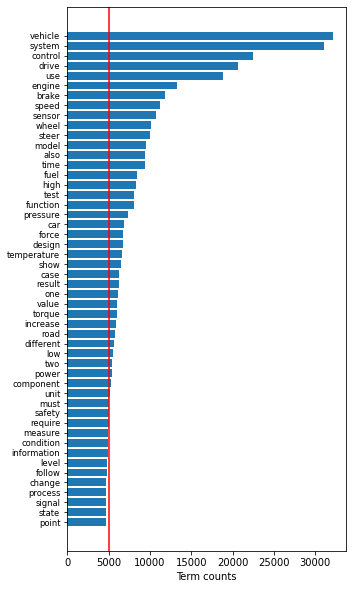

In [43]:
focus_terms_lemma.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_lemma))[0]
count = list(zip(*focus_terms_lemma))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(5,10))
plt.barh(y_pos, count, align='center')
plt.yticks(y_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

In [16]:
terms_lemma = counter_lemma.most_common(1000)

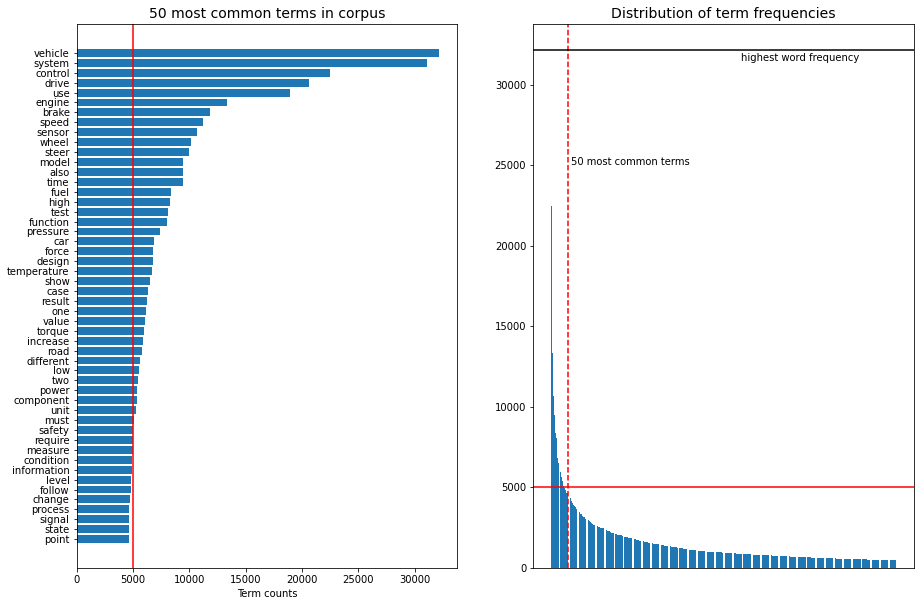

In [57]:
import matplotlib.pyplot as plt
import numpy as np

focus_terms_lemma.sort(key=lambda x: x[1], reverse=False)
terms50 = list(zip(*focus_terms_lemma))[0]
count50 = list(zip(*focus_terms_lemma))[1]
y_pos = np.arange(len(terms))

terms = list(zip(*terms_lemma))[0]
count = list(zip(*terms_lemma))[1]

fig, ax = plt.subplots(1,2, figsize=(15, 10))

ax[0].set_title('50 most common terms in corpus', fontsize=14)
ax[0].barh(terms50, count50)
ax[0].yaxis.set_ticks(terms50)
ax[0].set_xlabel("Term counts")
ax[0].axvline(5000, color='r')


ax[1].set_title('Distribution of term frequencies', fontsize=14)
ax[1].bar(terms, count, label=None)
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")
#ax[1].set_ylabel("Term counts")
ax[1].xaxis.set_ticks([])


ax[1].text(60, 25000, "50 most common terms")
ax[1].axvline(50, color="r", linestyle="--")
ax[1].axhline(5000, color="r", linestyle="-")
ax[1].text(550, 31500, "highest word frequency")
ax[1].axhline(32149, color="k", linestyle="-")


## Models

In [28]:
from sklearn.manifold import TSNE

In [29]:
terms_none = []

for term in focus_terms_none:
    terms_none.append(term[0])

In [30]:
model_none = Word2Vec.load(path_models+"word2vec_none_unigram.bin")

In [31]:
len(list(model_none.wv.vocab))

15924

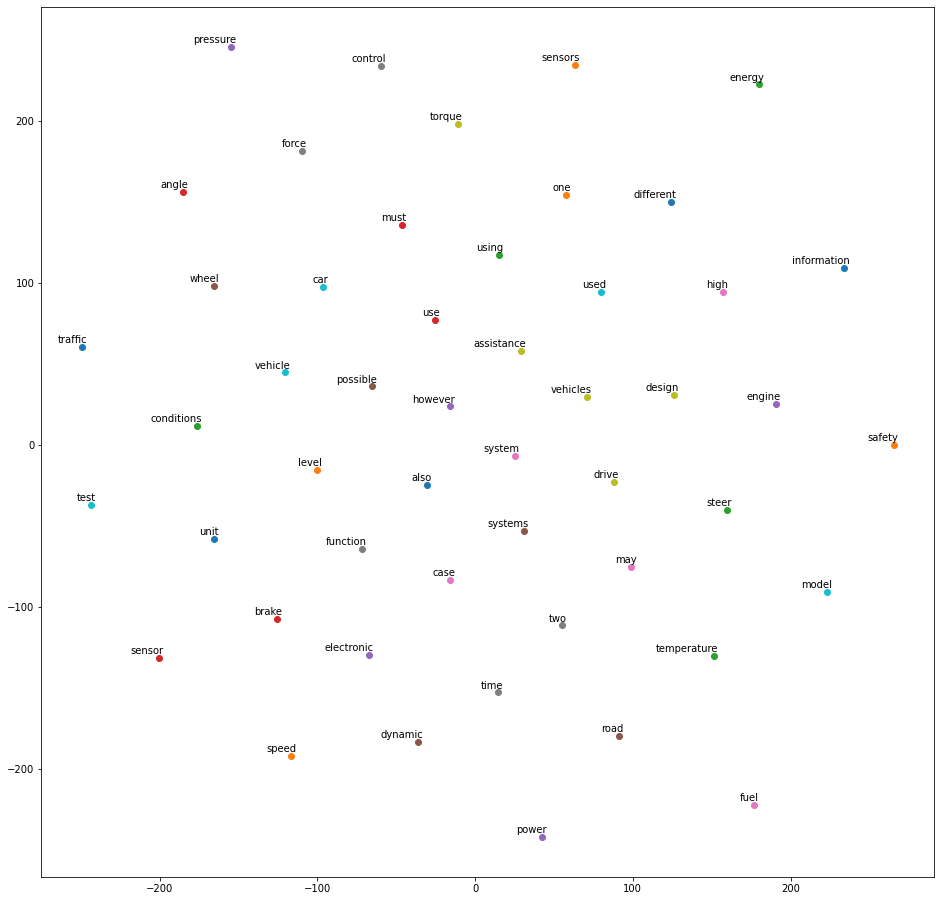

In [32]:
labels = []
tokens = []

for term in terms_none:
    tokens.append(model_none[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

In [33]:
terms_stem = []

for term in focus_terms_stem:
    terms_stem.append(term[0])

model_stem = Word2Vec.load(path_models+"word2vec_stem_unigram.bin")

len(list(model_stem.wv.vocab))

9936

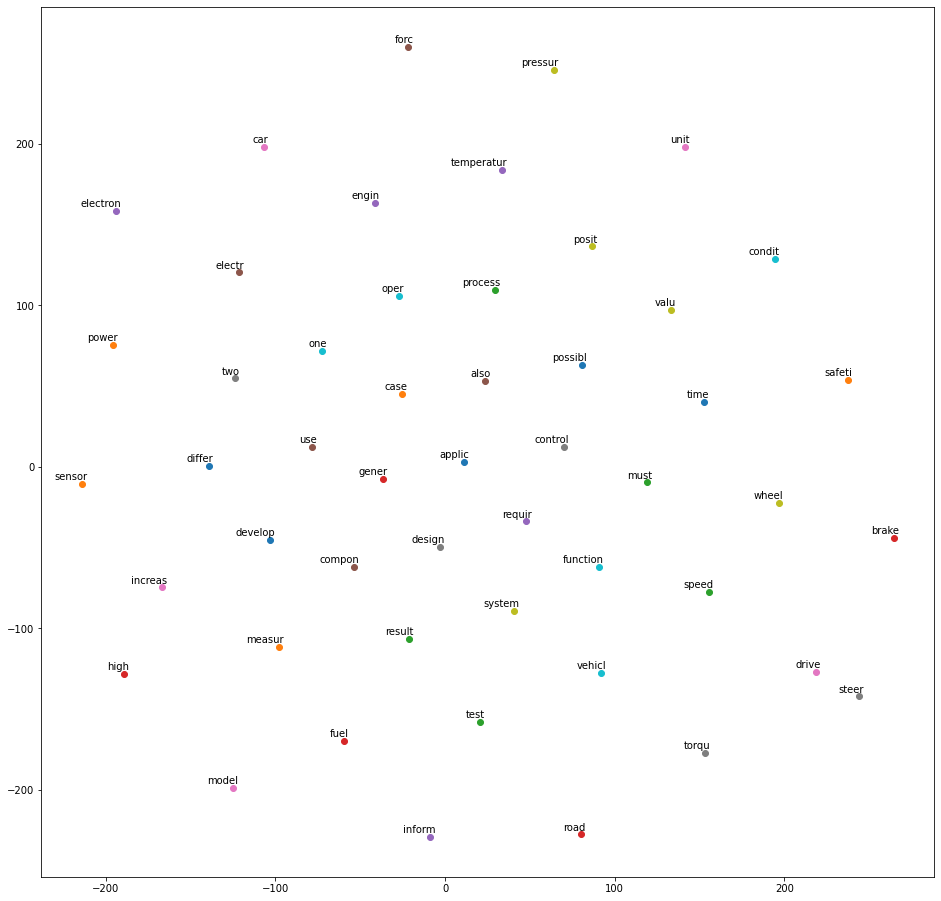

In [34]:
labels = []
tokens = []

for term in terms_stem:
    tokens.append(model_stem[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

In [35]:
terms_lemma = []

for term in focus_terms_lemma:
    terms_lemma.append(term[0])

model_lemma = Word2Vec.load(path_models+"word2vec_lemma_unigram.bin")

len(list(model_lemma.wv.vocab))

12322

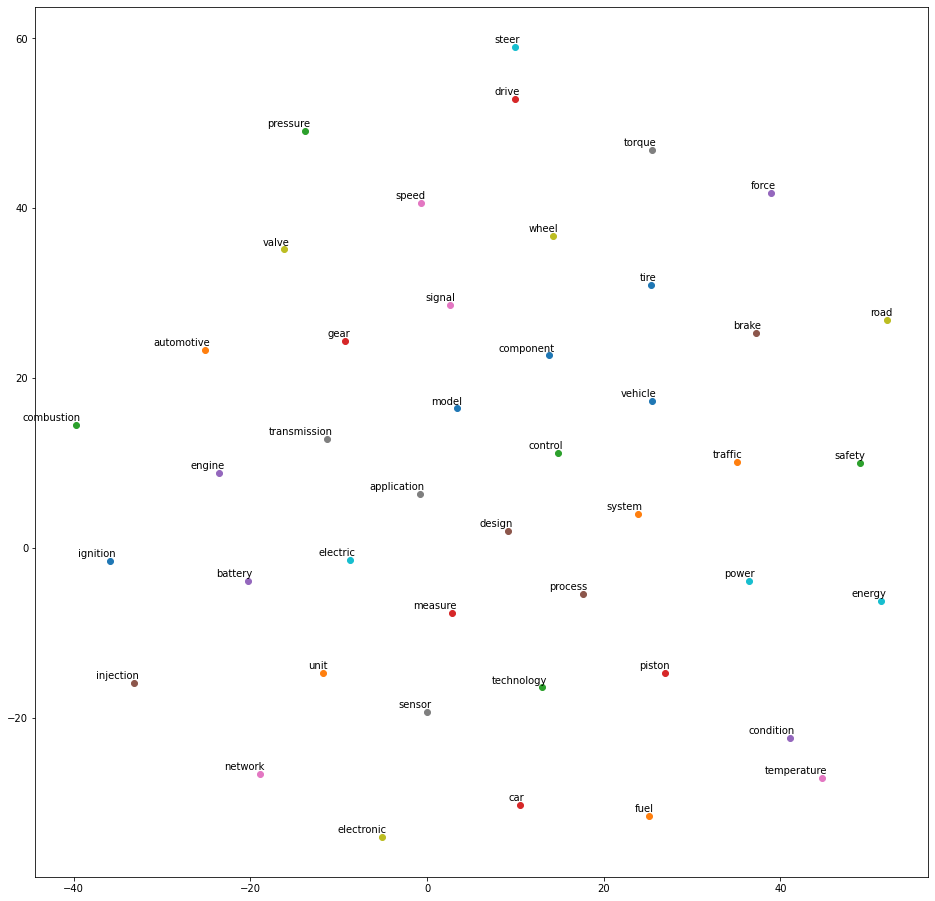

In [36]:
terms_lemma = ["vehicle", "system", "control", "drive", "engine", "brake", "speed", "sensor", "wheel", "steer", "model","fuel", "pressure", "car", "force", "design", "temperature", "torque", "road", "power", "component", "unit", "safety", "measure", "condition", "process", "signal", "application", "electronic", "energy", "tire", "traffic", "combustion", "piston", "battery", "injection", "network", "transmission", "valve", "electric", "ignition", "automotive", "technology", "gear"]

labels = []
tokens = []

for term in terms_lemma:
    tokens.append(model_lemma[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

In [37]:
#terms_lemma.remove("steer")
#terms_lemma.remove("angle")
#terms_lemma.remove("model")

terms_lemma.remove("different")

labels = []
tokens = []

for term in terms_lemma:
    tokens.append(model_lemma[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

ValueError: list.remove(x): x not in list